# COVID-19: Data Analyse

## 1. Trend Analyse: Voortschrijdend wekelijks gemiddelde

Om de evolutie van de uitbraak van de verschillende landen te bestuderen gaan we het voorschrijdend wekelijks gemiddelde van elk land berekenen en visualiseren. Eerst laden we de data in vanuit de dataset die publiek gemaakt wordt door de CSSE van Johns Hopkins University. Deze data wordt elke dag bijgewerkt.

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import urllib.request

# Data inlezen, wordt dagelijks geupdate door de CSSE van Johns Hopkins University
data = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
cases_df = pd.read_csv(data, delimiter=',')
cases_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24


Vervolgens gaan we de relevante gegevens die voor ons van belang zijn uit de dataset gaan filteren.

In [142]:
# Enkel de gewenste landen overhouden
countries = ['Belgium', 'China', 'Singapore', 'Italy', 'US', 'Netherlands']

# Overbodige kolommen verwijderen of hernoemen
cases_df = cases_df[cases_df['Country/Region'].isin(countries)]
cases_df = cases_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
cases_df = cases_df.rename(columns={'Country/Region': 'Country'})

In [143]:
# Aggregeren per land en telkens de som nemen over alle regios binnen dat land
cases_df = cases_df.groupby(['Country']).sum()
cases_df = cases_df.T
cases_df.tail()

Country,Belgium,China,Italy,Netherlands,Singapore,US
4/14/20,31119,83306,162488,27580,3252,607670
4/15/20,33573,83356,165155,28316,3699,636350
4/16/20,34809,83403,168941,29383,4427,667801
4/17/20,36138,83760,172434,30619,5050,699706
4/18/20,37183,83787,175925,31766,5992,732197


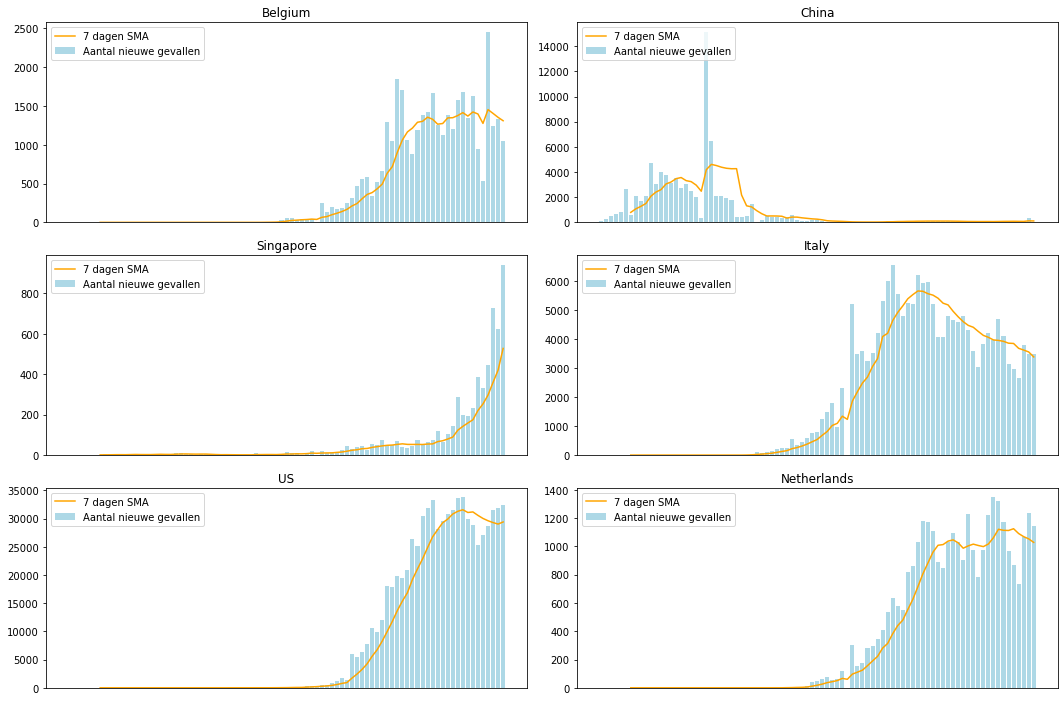

In [144]:
plt.figure(figsize=(15,10))
for i, country in enumerate(countries):
    # Bepaal het aantal nieuwe bevestigde gevallen
    cases_df_c = cases_df
    cases_df_c['Diff'] = cases_df_c[country].diff()

    # Bepaal telkens de Simple Moving Average van de voorbije week
    cases_df_c['SMA_7'] = cases_df_c.Diff.rolling(window=7).mean()

    # Plot beide kolommen in dezelfde grafiek
    plt.subplot(3,2, 1 + i)
    plt.title(country)
    plt.tight_layout()
    plt.bar(np.arange(len(cases_df_c['Diff'])), height=cases_df_c['Diff'], label='Aantal nieuwe gevallen', color='lightblue')
    plt.plot(cases_df_c['SMA_7'], label='7 dagen SMA', color='orange')
    plt.legend(loc='upper left')
    plt.xticks([])

## 2. Groei model: schatting verder verloop van de groei per land
Om de voortgang van het aantal COVID-19 infecties doorheen de tijd beter te begrijpen, visualiseren we het groeipercentage van de epidemie per land. Vervolgens fitten we een groei model op de data en visualiseren we de schattingen van het verdere verloop van de epidemie.

In [145]:
from scipy.optimize import curve_fit
from operator import itemgetter

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
colors = {
  'very_light_gray': '#ececec',
  'light_gray': '#b6b6b6',
  'orange': '#ff6f00',
  'light_blue': '#79c3ff',
  'light_purple': '#d88aff',
  'light_green': '#b4ec70',
  'light_red': '#ff7482',
}

start_date = np.datetime64('2020-01-22')
all_dates = [start_date + np.timedelta64(x, 'D') for x in range(0, 100)]

In [146]:
def convert_to_ts (data, country):
  df = pd.DataFrame(data[data['Country/Region'] == country].reset_index().sum(
    axis=0, numeric_only=True
  )[3:]).reset_index()
  df.columns = ['date', 'count']
  df['date'] = df['date'].astype('datetime64[ns]')
  return df

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data = pd.read_csv(url, delimiter=',')
dat = [
  { 'name': 'China', 'color': 'light_gray' },
  { 'name': 'Belgium', 'color': 'light_red' },
  { 'name': 'Italy', 'color': 'light_green' },
  { 'name': 'Netherlands', 'color': 'light_blue' },
  { 'name': 'Singapore', 'color': 'light_purple' },
  { 'name': 'US', 'color': 'orange' },
]
countries = { d['name']: convert_to_ts(data, d['name']) for d in dat}

### Bepaal de best-fit offset voor elk land dat het best past in het model van een epidemie (vb: eerste 7 dagen weglaten)
Voor elk land bepalen we het aantal dagen dat het achterkomt op China. Dit doen we door voor elk land een aantal te kiezen waardoor de curve het best lijkt op de curve van China.

In [147]:
def comparison_to_china_penalty (df, offset):
  china_counts = countries['China']['count'].to_numpy()
  counts = df['count'].to_numpy()
  residuals = []
  for i in range(0, 7):
    if i + offset < len(counts):
      residuals.append(china_counts[i] - counts[i + offset])
    else:
      residuals.append(0)
  return np.power(residuals, 2).sum()

def find_optimal_offset (df):
  penalties = []
  for offset in range(len(df)):
    penalties.append(comparison_to_china_penalty(df, offset))
  return np.argmin(penalties)

for d in dat:
  d['offset'] = find_optimal_offset(countries[d['name']])
dat.sort(key=lambda x: x['offset'])

Best-Fit offset voor elk land, gesorteerd op aantal dagen vertraging ten opzichte van China.

In [148]:
pd.DataFrame(dat, columns=['name', 'offset'])

,name,offset
0,China,0
1,Italy,37
2,US,48
3,Netherlands,53
4,Belgium,54
5,Singapore,76


### Visualiseren van het begin van de epidemie voor elk land
De groeicurve van elk land visualiseren, om zo de offset parameter te bepalen. Op die manier kunnen we de groei ratio's van het aantal bevestigde gevallen voor de verschillende landen direct vergelijken.

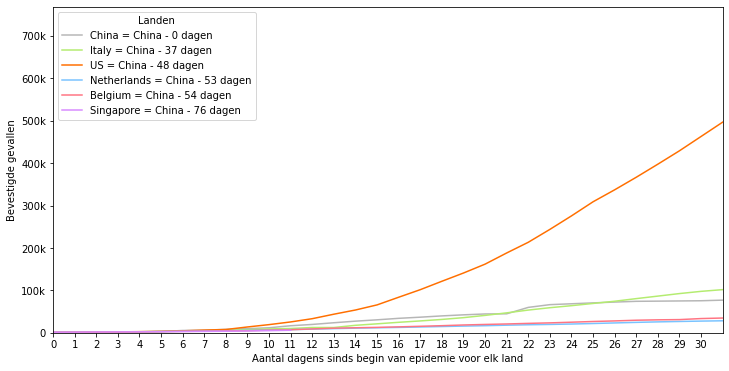

In [149]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

for d in dat:
  country_name, offset, color_key = itemgetter('name', 'offset', 'color')(d)
  country = countries[country_name]
  ax.plot(
    country['date'] - np.timedelta64(offset, 'D'),
    country['count'],
    label=f'{country_name} = China - {offset} dagen',
    color=colors[color_key]
  )

plt.xlim((np.datetime64('2020-01-22'), np.datetime64('2020-02-22')))
plt.xticks([np.datetime64('2020-01-22') + np.timedelta64(d, 'D') for d in range(0, 31)])
ax.set_xticklabels(range(0, 31))
plt.xlabel('Aantal dagens sinds begin van epidemie voor elk land')

plt.ylim(bottom=0)
ax.set_yticklabels(['0' if x == 0 else '{:.0f}k'.format(int(x) / 1000) for x in ax.get_yticks().tolist()])
plt.ylabel('Bevestigde gevallen')

plt.legend(title='Landen', loc='upper left')

plt.show()

### Schatting groeicurves
Een simpel model voor het verloop van een epidemie is een logistische of sigmoïde functie. Dit is een functie die eerst snel exponentieel stijgt, en vervolgens overgaat tot een constante waarde. Voor elk land zoeken we de best-fit parameters gebaseerd op de beschikbare data.

In [150]:
def sigmoid (x, A, B, slope, offset):
  return A / (1 + (1 + B * x) * np.exp ((x - (offset + 17.75)) / slope))

def fit_to_sigmoid (df, offset, all_dates):
  dates = (df['date'] - start_date) / np.timedelta64(1, 'D')
  p, _ = curve_fit(
    lambda x, A, B, slope: sigmoid(x, A, B, slope, offset),
    dates,
    df['count'],
    p0=[80000, 0.01, -5],
    bounds=(
      [-np.inf, 0, -np.inf],
      [np.inf, 1, -0.01]
    ),
    maxfev=5000
  )
  return sigmoid((all_dates - start_date) / np.timedelta64(1, 'D'), *p, offset), p

for d in dat:
  country_name, offset, color_key = itemgetter('name', 'offset', 'color')(d)
  country = countries[country_name]
  fit, p = fit_to_sigmoid(country, offset, all_dates)
  d['fit'] = fit
  d['p'] = p

### Verwachting maximaal aantal bevestigde gevallen

Deze tabel toont de schatting van de verwachte maximaal aantal gevallen per land op basis van het best-fit model.

In [151]:
china_slope = dat[0]['p'][2]
growth_rate_relative_to_china = lambda p: china_slope/p[2]

table_data = []
for d in dat:
  country_name, offset, p = itemgetter('name', 'offset', 'p')(d)
  table_data.append([
    country_name, 
    '' if country_name == 'China' else f'{offset}',
    f'{growth_rate_relative_to_china(p):.1f}',
    f'{p[0]:,.0f}'
  ])
    
huidig = pd.DataFrame(
    map(lambda obj: [obj[0], f'{obj[1]["count"].max():,.0f}'], countries.items()), columns=['Land', 'Huidig aantal gevallen']
)

voorspelling = pd.DataFrame(table_data, columns=['Land', 'Dagen achter op China', 'Groei ratio (relatief tov. China)', 'Verwacht maximaal aantal gevallen'])

pd.merge(voorspelling, huidig, on='Land')

,Land,Dagen achter op China,Groei ratio (relatief tov. China),Verwacht maximaal aantal gevallen,Huidig aantal gevallen
0,China,,1.0,"81,808","83,787"
1,Italy,37,0.7,"176,194","175,925"
2,US,48,0.9,"807,451","732,197"
3,Netherlands,53,0.7,"34,999","31,766"
4,Belgium,54,0.7,"41,331","37,183"
5,Singapore,76,0.6,"1,081,733","5,992"


### Groeicurves
Voor elk land plotten we de schatting van de groeicurves op basis van het model, samen met de actuele data.

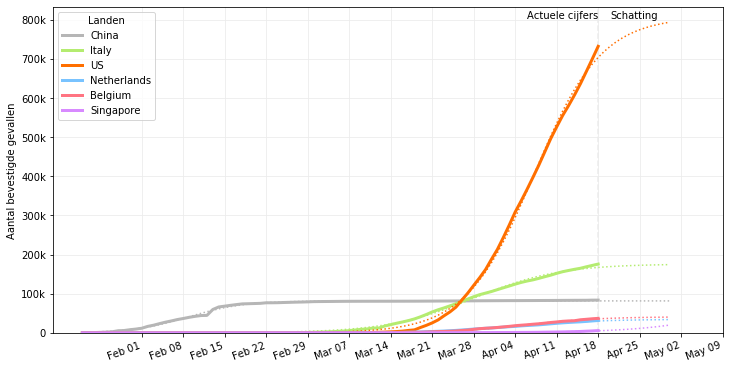

In [152]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

for d in dat:
  country_name, color_key, fit = itemgetter('name', 'color', 'fit')(d)
  country = countries[country_name]
  ax.plot(
    country['date'],
    country['count'],
    label=country_name,
    color=colors[color_key],
    linewidth=3
  )
  ax.plot(
    all_dates,
    fit,
    color=colors[color_key],
    linestyle=':'
  )

_, y_max = ax.get_ylim()
now = np.datetime64('now').astype('datetime64[D]')
yesterday = np.datetime64('today', 'D') - np.timedelta64(1, 'D')
plt.vlines(yesterday, ymin=0, ymax=y_max, colors=colors['very_light_gray'], linestyles='dashed')
plt.annotate('Actuele cijfers', xy=(now - np.timedelta64(1, 'D'), y_max - 10000), ha='right', va='top')
plt.annotate('Schatting', xy=(now + np.timedelta64(1, 'D'), y_max - 10000), ha='left', va='top')

ticks = [np.datetime64('2020-02-01') + np.timedelta64(7 * x, 'D') for x in range(0, 15)]
label_from_tick = lambda tick: pd.to_datetime(tick).strftime('%b %d')
tick_labels = list(map(label_from_tick, ticks))
plt.xticks(ticks, tick_labels, rotation=20, horizontalalignment='right')

plt.ylim((0, y_max))
ax.set_yticklabels(['0' if x == 0 else '{:.0f}k'.format(int(x) / 1000) for x in ax.get_yticks().tolist()])
plt.ylabel('Aantal bevestigde gevallen')

plt.grid(color=colors['very_light_gray'])

plt.legend(title='Landen', loc='upper left')

plt.show()